# Supervised Learning Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Part A

## 1. Data Understanding:

### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. 

In [2]:
normal = pd.read_csv('Normal.csv')
typeh = pd.read_csv('Type_H.csv')
types = pd.read_csv('Type_s.csv')

### B. Print Shape and columns of all the 3 DataFrames.

In [3]:
print('Shape of normal DataFrame is ',normal.shape)
print('Shape of Type_H DataFrame is ',typeh.shape)
print('Shape of Type_S DataFrame is ',types.shape)

Shape of normal DataFrame is  (100, 7)
Shape of Type_H DataFrame is  (60, 7)
Shape of Type_S DataFrame is  (150, 7)


In [4]:
# Columns of Normal DataFrame upto 5th Row
print('Columns of Normal DataFrame.')
normal.head()

Columns of Normal DataFrame.


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [5]:
# Columns of Type_H DataFrame upto 5th Row
print('Columns of Type_H DataFrame.')
typeh.head()

Columns of Type_H DataFrame.


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
# Columns of Type_S DataFrame upto 5th Row
print('Columns of Type_S DataFrame')
types.head()

Columns of Type_S DataFrame


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### C. Compare Column names of all the 3 DataFrames and clearly write observations.

In [7]:
# Checking if the columns of the DataFrames are equal or not

if set(normal.columns) == set(typeh.columns) == set(types.columns):
    print('All the columns of 3 DataFrames are similar.')
else:
    print('Columns are different in the 3 DataFrames.')

All the columns of 3 DataFrames are similar.


### D. Print DataTypes of all the 3 DataFrames.

In [8]:
# Printing datatypes of the 3 DataFrames

print(normal.dtypes)
print('-'*20)
print(typeh.dtypes)
print('-'*20)
print(types.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
--------------------
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
--------------------
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


### E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [9]:
normal['Class'].value_counts()

Class
Normal    73
Nrmal     27
Name: count, dtype: int64

In [10]:
typeh['Class'].value_counts()

Class
Type_H    37
type_h    23
Name: count, dtype: int64

In [11]:
types['Class'].value_counts()

Class
Type_S    133
tp_s       17
Name: count, dtype: int64

This shows that each Class is having 2 values which can be combined as a single value and use for the downstream process.

## 2. Data Preparation and Exploration:

### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [12]:
normal = normal.replace(to_replace ='Nrmal',value ='Normal')
normal.Class.value_counts()

Class
Normal    100
Name: count, dtype: int64

In [13]:
typeh = typeh.replace(to_replace='type_h',value='Type_H')
typeh.Class.value_counts()

Class
Type_H    60
Name: count, dtype: int64

In [14]:
types = types.replace(to_replace='tp_s',value='Type_S')
types.Class.value_counts()

Class
Type_S    150
Name: count, dtype: int64

### B. Combine all the 3 DataFrames to form a single DataFrame.

In [15]:
combined = [normal,typeh,types]

# Concatinating the 3 Dataframes
df = pd.concat(combined)
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


### C. Print 5 random samples of this DataFrame.

In [16]:
# 5 random samples of the combined DataFrame
df.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
143,73.635962,9.711318,63.000000,63.924644,98.727930,26.975787,Type_S
77,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,Normal
47,78.425951,33.425951,76.277439,45.000000,138.554111,77.155172,Type_S
10,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,Normal
19,43.436451,10.095743,36.032224,33.340707,137.439694,-3.114451,Normal


### D. Print Feature-wise percentage of Null values.

In [17]:
df.isnull().sum() / len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

No null values are present in the columns.

### E. Check 5-point summary of the new DataFrame. 

In [18]:
# 5 point summary of the combined dataframe
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


## 3. Data Analysis: 

### A. Visualize a heatmap to understand correlation between all features.

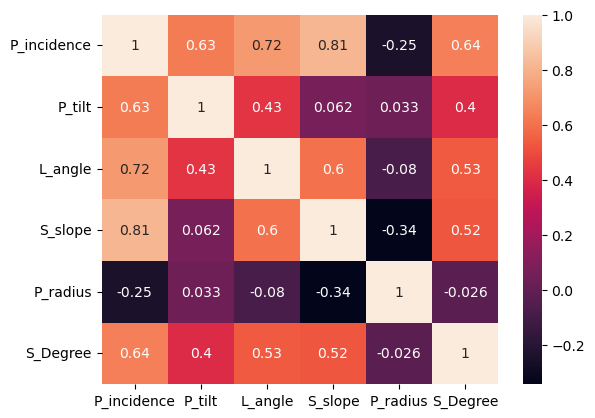

In [19]:
sns.heatmap(data = df[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']].corr(), annot=True, cbar=True);

### B. Share insights on correlation.

### B.A. Features having stronger correlation with correlation value.

P_incidence and S_slope is having the stronger correlation with 0.81 value.

P_incidence and L_angle is having a stronger correlation of 0.72.

### B.B. Features having weaker correlation with correlation value.

L_angle and P_radius are weakly correlated with -0.2 value.

S_slope and P_radius are weakly correlated with -0.3 value.

### C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

C:\Users\fenuj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


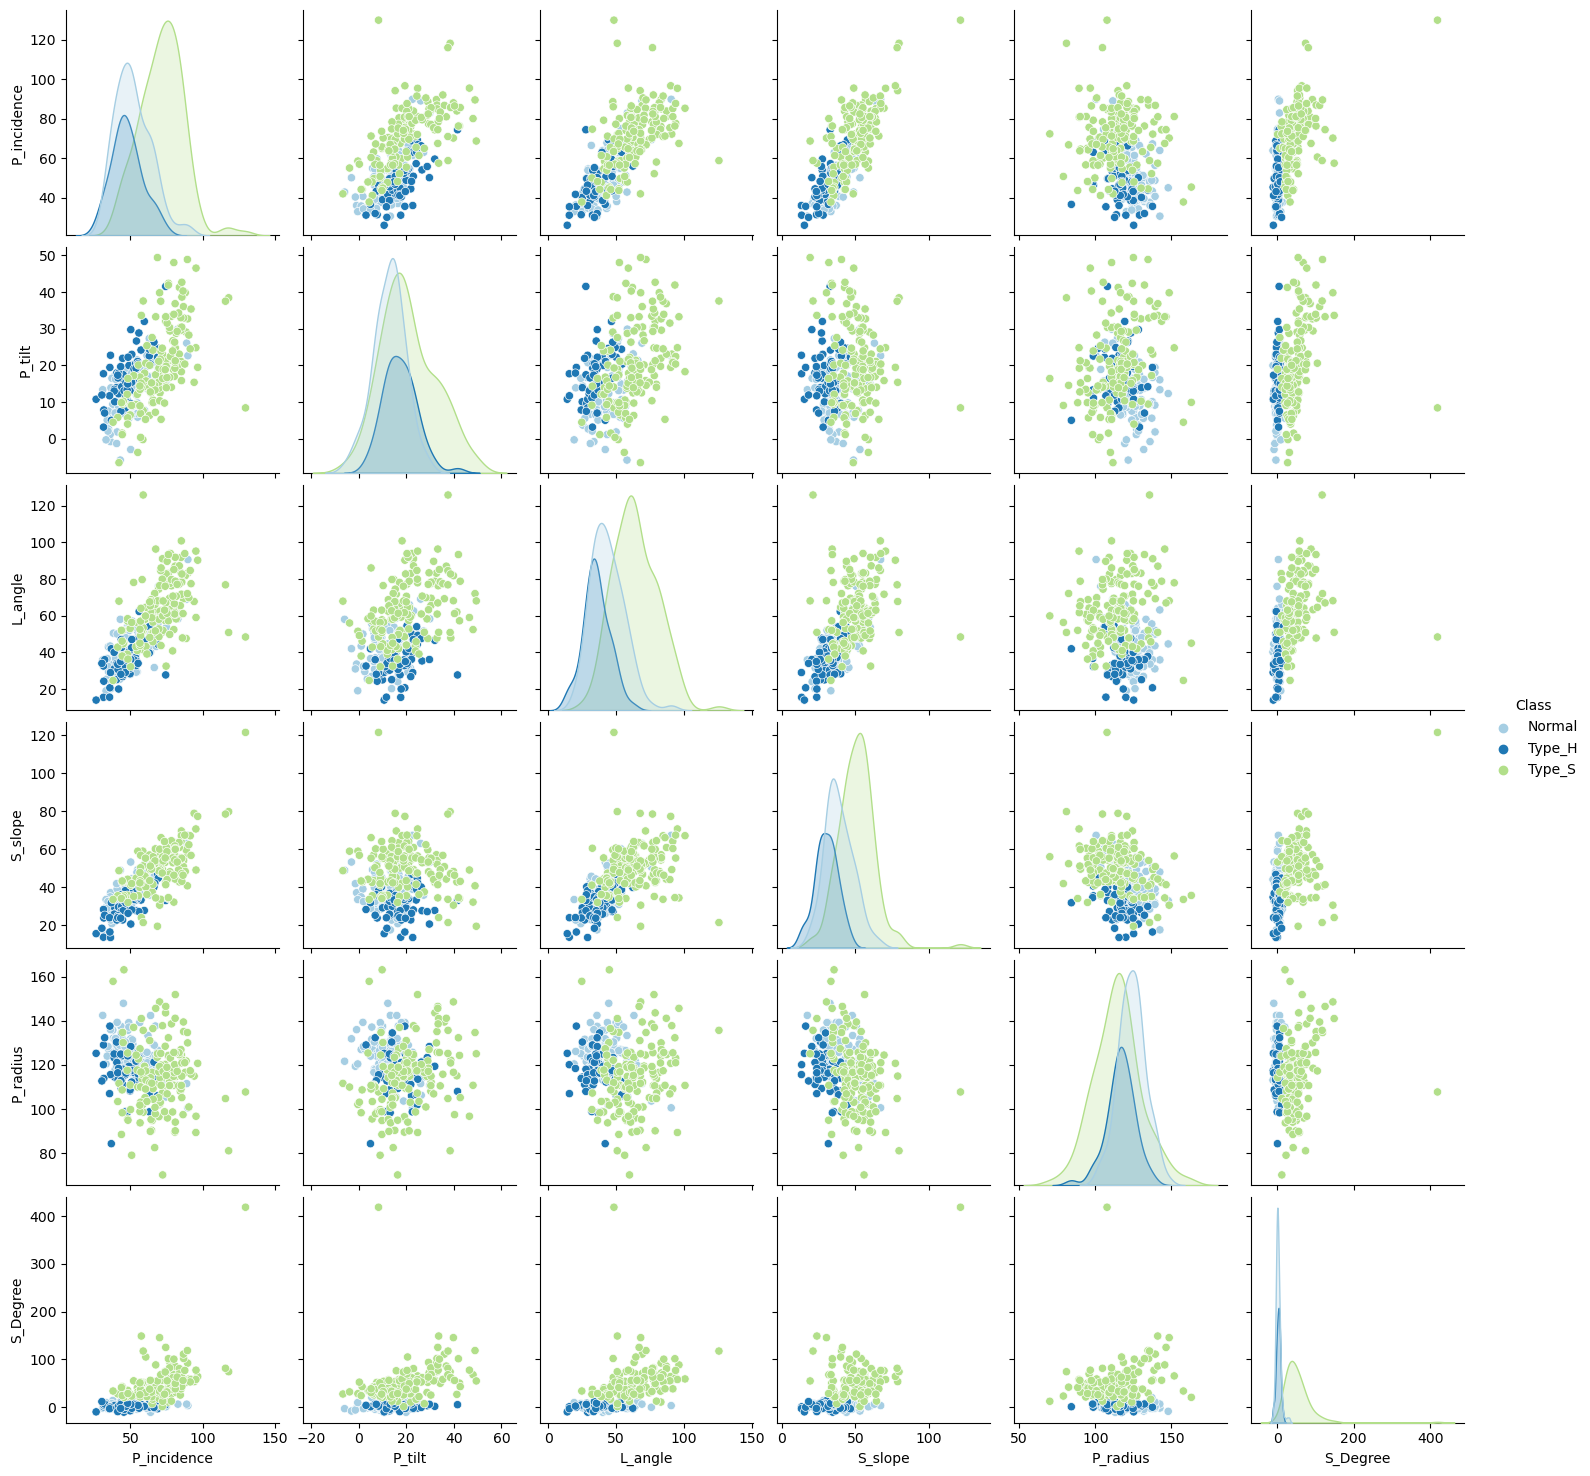

In [20]:
sns.pairplot(data=df, vars=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'], hue='Class', palette='Paired');

S_degree is not correlated to the other parameters.

### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. 

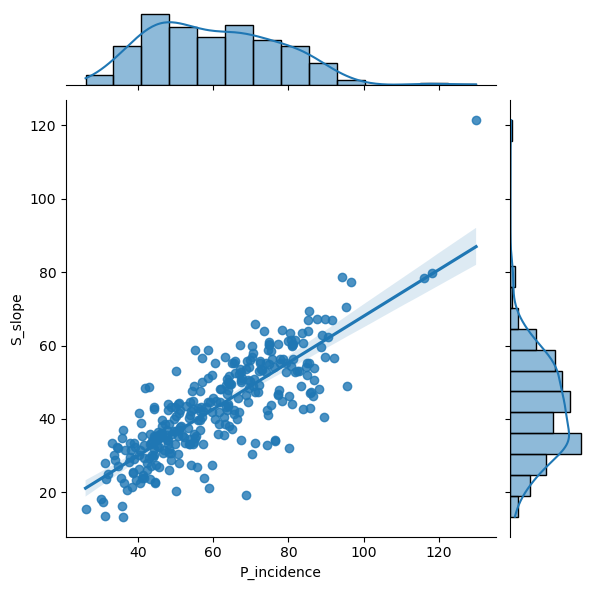

In [21]:
sns.jointplot(data=df, x='P_incidence', y='S_slope', kind='reg');

P_incidence and S_slope are positively correlated.

Both are normally distributed and are right skewed.

### E. Visualize a boxplot to check distribution of the features and share insights.

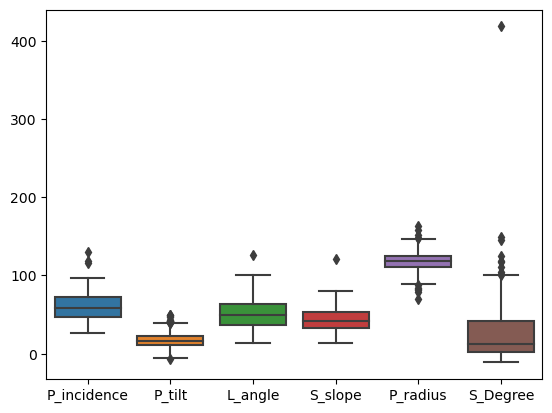

In [22]:
sns.boxplot(data=df);

S_Degree is having the highest number of outliers

## 4. Model Building:

### A. Split data into X and Y. 

In [23]:
x = df.drop(['Class'],axis=1)
y = df['Class']

### B. Split data into train and test with 80:20 proportion.

In [24]:
x_scaled = x.apply(zscore)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

### C. Train a Supervised Learning Classification base model using KNN classifier.

In [25]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

### D. Print all the possible performance metrics for both train and test data.

In [26]:
test_pred = KNN.predict(x_test)
KNN.score(x_test,y_test)

0.8548387096774194

In [27]:
cm = metrics.confusion_matrix(y_test,test_pred,labels = ['Normal','Type_H','Type_S'])
cm

array([[16,  1,  1],
       [ 4,  7,  0],
       [ 2,  1, 30]], dtype=int64)

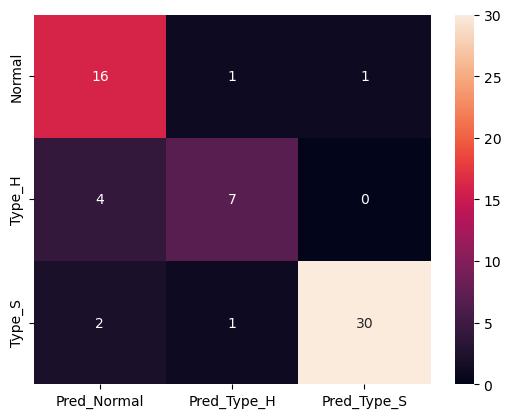

In [28]:
df_cm = pd.DataFrame(cm, index = [ i for i in ['Normal','Type_H','Type_S']], columns=[ i for i in ['Pred_Normal', 'Pred_Type_H', 'Pred_Type_S']])
sns.heatmap(df_cm, annot=True);

In [29]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



## 5. Performance Improvement:

### A. Experiment with various parameters to improve performance of the base model. 

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=25, algorithm='ball_tree', weights='distance', p=2)
knn1.fit(x_train,y_train)
train_pred = knn1.predict(x_train)
test_pred = knn1.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print("Training metrics: \n",classification_report(y_train,train_pred))
print("Testing metrics: \n",classification_report(y_test,test_pred))

Train Accuracy is:  1.0
Test Accuracy is:  0.8225806451612904
Training metrics: 
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        82
      Type_H       1.00      1.00      1.00        49
      Type_S       1.00      1.00      1.00       117

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Testing metrics: 
               precision    recall  f1-score   support

      Normal       0.68      0.83      0.75        18
      Type_H       0.70      0.64      0.67        11
      Type_S       0.97      0.88      0.92        33

    accuracy                           0.82        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.84      0.82      0.83        62



### B. Clearly showcase improvement in performance achieved.

A. Training Accuracy has increased by 10%

B. Precision and recall values of type_h testing have gone up by 4% compliant to type_s and normal.

### C. Clearly state which parameters contributed most to improve model performance.

'weights' = 'distance' parameter has played an important role in improving model performance.

When 'weights' = 'distance' has higher influence of neighbouring datapoints instead of uniform resulting into better predictions.

# Part B

## 1. Data Understanding and Preparation:

### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. 

In [31]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

### B. Print shape and Column Names and DataTypes of both the Dataframes.

In [32]:
# Display the shape,datatypes and column names of Data1 DataFrame
print('The shape of Data1 is :',df1.shape)
print('-'*20)
print(df1.dtypes)
print('-'*20)
df1.head()

The shape of Data1 is : (5000, 8)
--------------------
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
--------------------


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [33]:
# Display the shape, datatypes and column names of Data2 Dataframe
print('The shape of Data2 is:',df2.shape)
print('-'*20)
print(df2.dtypes)
print('-'*20)
df2.head()

The shape of Data2 is: (5000, 7)
--------------------
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object
--------------------


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame.

In [34]:
result = pd.merge(df1, df2, on="ID")
result.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### D. Change Datatype of below features to ‘Object’.

### ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

In [35]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [36]:
result = result.astype({'CreditCard':'str','InternetBanking':'str','FixedDepositAccount':'str','Security':'str','Level':'str','HiddenScore':'str'})
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


## 2. Data Exploration and Analysis:

### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

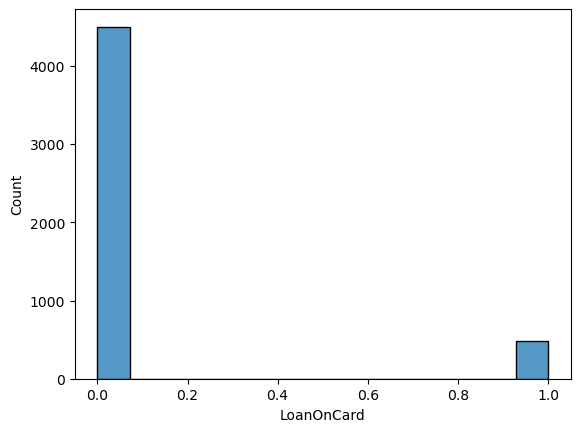

In [37]:
sns.histplot(data=result, x='LoanOnCard');

1. Only 1% of the customers have Loan on their card rest 99% customers doesn't have loan on their card.

2. Customers having loan on card is much lesser than those doesn't.

### B. Check the percentage of missing values and impute if required.

In [38]:
result.isnull().sum()/len(df)*100

ID                     0.000000
Age                    0.000000
CustomerSince          0.000000
HighestSpend           0.000000
ZipCode                0.000000
HiddenScore            0.000000
MonthlyAverageSpend    0.000000
Level                  0.000000
Mortgage               0.000000
Security               0.000000
FixedDepositAccount    0.000000
InternetBanking        0.000000
CreditCard             0.000000
LoanOnCard             6.451613
dtype: float64

0.45% of Null values in LoanOnCard

In [39]:
result.dropna(inplace=True)

In [40]:
result.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

### C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [41]:
categorical_columns = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security']
for col in categorical_columns:
    unique_values = result[col].unique()
    print(f"Unique values in {col}: {unique_values}")

print(result)

Unique values in CreditCard: ['0' '1']
Unique values in InternetBanking: ['0' '1']
Unique values in FixedDepositAccount: ['0' '1']
Unique values in Security: ['0' '1']
        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  \
9       10   34              9           180    93023           1   
10      11   65             39           105    94710           4   
11      12   29              5            45    90277           3   
12      13   48             23           114    93106           2   
13      14   59             32            40    94920           4   
...    ...  ...            ...           ...      ...         ...   
4995  4996   29              3            40    92697           1   
4996  4997   30              4            15    92037           4   
4997  4998   63             39            24    93023           2   
4998  4999   65             40            49    90034           3   
4999  5000   28              4            83    92612           3   

   

In [42]:
dfmodel = result[['HiddenScore','Level','FixedDepositAccount','HighestSpend','MonthlyAverageSpend','Mortgage','LoanOnCard']]

In [43]:
dfmodel.isnull().values.any()

False

## 3. Data Preparation and model building:

### A. Split data into X and Y.

In [44]:
X = result.drop(['LoanOnCard','ID','ZipCode'],axis=1)
y = result['LoanOnCard']

### B. Split data into train and test. Keep 25% data reserved for testing.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### C. Train a Supervised Learning Classification base model - Logistic Regression.

In [46]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [47]:
y_predict = model.predict(X_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
model_score = model.score(X_test,y_test)
print('score : {:.3f}'.format(model_score))
f1 = f1_score(y_test,y_predict)
print('F1 score: {:.3f}'.format(f1))

score : 0.948
F1 score: 0.698


### D. Print evaluation metrics for the model and clearly share insights.

In [49]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('-'*20)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*20)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9437751004016064
--------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.82      0.57      0.68       127

    accuracy                           0.94      1245
   macro avg       0.89      0.78      0.82      1245
weighted avg       0.94      0.94      0.94      1245

--------------------
Confusion Matrix:
[[1102   16]
 [  54   73]]


C:\Users\fenuj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It is observed that accuracy is more but precision and recall values are on lower side for event 1.

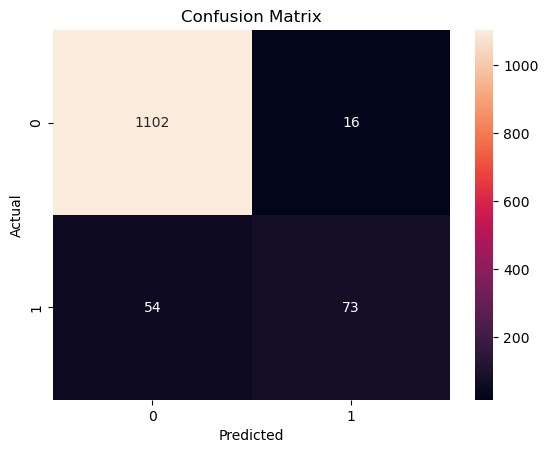

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The accuracy and F1-score are relatively high, so there is room for improving the recall of the minority class to ensure better identification of loan approvals.

### E. Balance the data using the right balancing technique.

In [51]:
result.LoanOnCard.value_counts()

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64

In [52]:
#create two different dataframe of majority and minority class 
df_majority = result[(result['LoanOnCard']==0)] 
df_minority = result[(result['LoanOnCard']==1)]

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples= 4500, random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [53]:
df_upsampled.LoanOnCard.value_counts()

LoanOnCard
1.0    4500
0.0    4500
Name: count, dtype: int64

### F. Again train the same previous model on balanced data.

In [54]:
X = df_upsampled.drop(['LoanOnCard'],axis=1)
y = df_upsampled['LoanOnCard']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### G. Print evaluation metrics and clearly share differences observed.

In [55]:
model_score = model.score(X_test,y_test)
print('score : {:.3f}'.format(model_score))
f1 = f1_score(y_test,y_predict)
print('F1 score: {:.3f}'.format(f1))

score : 0.899
F1 score: 0.899


The score negligibly reduced after resampling while F1 score has increased.

## 4. Performance Improvement:

### A. Train a base model each for SVM, KNN.

In [56]:
import warnings
warnings.filterwarnings('always')

svm_model = SVC()

svm_model.fit(X_train, y_train)

svm_Y_pred = svm_model.predict(X_test)

metrics.f1_score(y_test, svm_Y_pred, average='weighted', labels=np.unique(svm_Y_pred))
0.91076923076923078

print("Classification Report for SVM:")
print(classification_report(y_test, svm_Y_pred))


knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)


knn_Y_pred = knn_model.predict(X_test)

print("Classification Report for KNN:")
print(classification_report(y_test, knn_Y_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1135
         1.0       0.50      1.00      0.66      1115

    accuracy                           0.50      2250
   macro avg       0.25      0.50      0.33      2250
weighted avg       0.25      0.50      0.33      2250



C:\Users\fenuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fenuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fenuj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89      1135
         1.0       0.85      0.98      0.91      1115

    accuracy                           0.90      2250
   macro avg       0.91      0.90      0.90      2250
weighted avg       0.91      0.90      0.90      2250



### B. Tune parameters for each of the models wherever required and finalize a mode.

In [57]:
def classify(classifier):
    classifier.fit(X_train,y_train)
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)
    print('Training Performace')
    print(classification_report(y_train,pred_train))
    print('*'*50)
    print('Testing Performace')
    print(classification_report(y_test,pred_test))

In [58]:
svm = SVC(C=5,kernel='rbf',gamma='auto')
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3365
         1.0       1.00      1.00      1.00      3385

    accuracy                           1.00      6750
   macro avg       1.00      1.00      1.00      6750
weighted avg       1.00      1.00      1.00      6750

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1135
         1.0       1.00      1.00      1.00      1115

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



In [59]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=15)
classify(dt)

Training Performace
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      3365
         1.0       0.96      1.00      0.98      3385

    accuracy                           0.98      6750
   macro avg       0.98      0.98      0.98      6750
weighted avg       0.98      0.98      0.98      6750

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1135
         1.0       0.96      0.99      0.98      1115

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250



### C. Print evaluation metrics for final model.

In [60]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C=0.1, kernel='linear', gamma=1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [61]:
print('Acuuracy of Training Data',svc_model.score(X_train, y_train))
print('Accuracy of Testing Data',svc_model.score(X_test, y_test))

Acuuracy of Training Data 0.8718518518518519
Accuracy of Testing Data 0.8737777777777778


Almost same accuracy for both Training and Testing Data.

Confusion Matrix


<Axes: >

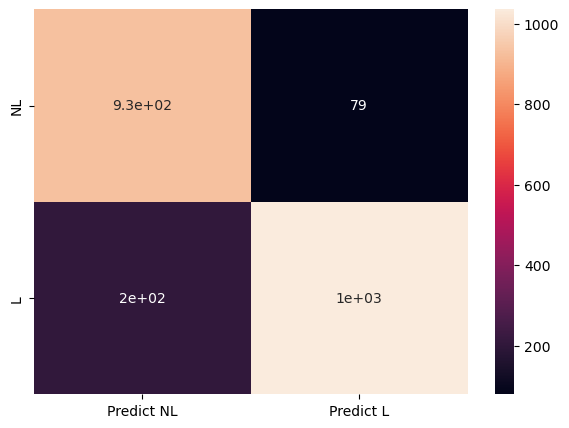

In [62]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["NL","L"]],
                  columns = [i for i in ["Predict NL","Predict L"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [63]:
print('Classification matrix:\n',classification_report(prediction,y_test))

Classification matrix:
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1009
         1.0       0.93      0.83      0.88      1241

    accuracy                           0.87      2250
   macro avg       0.87      0.88      0.87      2250
weighted avg       0.88      0.87      0.87      2250



This Model has better Precision Rate and also better Recall value.

### D. Share improvement achieved from base model to final model.

In [68]:
base_svm_report = """
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.82      0.57      0.68       127

    accuracy                           0.94      1245
   macro avg       0.89      0.78      0.82      1245
weighted avg       0.94      0.94      0.94      1245
"""

# Classification report for final SVM model
final_svm_report = """
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1135
         1.0       0.96      0.99      0.98      1115

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250
"""


def calculate_improvement(base_report, final_report):
    base_values = base_report.split("\n")[3].split()
    final_values = final_report.split("\n")[3].split()

    improvements = []
    for base_val, final_val in zip(base_values[1:], final_values[1:]):
        improvement = float(final_val) - float(base_val)
        improvements.append(improvement)

    return improvements

In [69]:
improvements = calculate_improvement(base_svm_report, final_svm_report)


print("Improvement Achieved from Base Model to Final Model:")
print("----------------------------------------------------")
print(f"Precision Improvement: {improvements[0]:.2f}")
print(f"Recall Improvement: {improvements[1]:.2f}")
print(f"F1-Score Improvement: {improvements[2]:.2f}")

Improvement Achieved from Base Model to Final Model:
----------------------------------------------------
Precision Improvement: 0.04
Recall Improvement: -0.03
F1-Score Improvement: 0.01


Improvements Achieved from Base Model to Final Model:

1.Precision Improvement: 0.04

2.Recall Improvement: -0.03

3.F1-Score Improvement: 0.01

Concluding the final model has shown an improvement in Precision and F1 Score compared to the base model.While the recall has slightly decreased by 0.03,the overall performance has improved in the final model.|